![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [54]:
import pandas as pd

df = pd.read_excel('BBDD_Hospitalización.xlsx')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

c:\Users\mateo\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [55]:
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA: Cuenta con datos numeros y ademas un string NO, reemplazamos NO por 0.

In [56]:
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', 0, inplace=True)

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

### `Pairplot`

En esta instancia, emplearemos un paso fundamental dentro de todo **EDA** que nos muestra todas las relaciones entre las variables cuantitativas del dataframe que estemos trabajando. La importancia de este paso radica en que nos permite elegir las mejores variables predictoras para nuestro modelo.

In [ ]:
import seaborn as sns

sns.pairplot(df, hue="HOSPITALIZACION", palette = ['r', 'b'])
plt.show()

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [ ]:
import matplotlib.pyplot as plt

frecuencia_valores = df['EDAD'].value_counts()
print(frecuencia_valores)

plt.scatter(range(len(df['EDAD'])), df['EDAD'])
plt.xlabel('Índice de la Observación')
plt.ylabel('Valores')
plt.title('Gráfico de Puntos de EDAD')
plt.show()

In [ ]:
plt.scatter(range(len(df['PSA'])), df['PSA'])
plt.xlabel('Índice de la Observación')
plt.ylabel('Valores')
plt.title('Gráfico de Puntos de PSA')
plt.show()

In [ ]:
frecuencia_valores = df['NUMERO DE MUESTRAS TOMADAS'].value_counts()
print(frecuencia_valores)

df['NUMERO DE MUESTRAS TOMADAS'].hist(bins=20) 
plt.xlabel('NUMERO DE MUESTRAS TOMADAS')
plt.ylabel('Frecuencia')
plt.title('Histograma de NUMERO DE MUESTRAS TOMADAS')
plt.show()

Se omitio el numero 0 para graficar el siguiente Histograma, es decir, no se tuvo en cuenta cuando el paciente no estuvo complicaciones infecciosas.

In [ ]:
frecuencia_valores = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].value_counts()
print(frecuencia_valores)


plt.hist(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], bins=20, range=(1, df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].max()))
plt.xlabel('NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA')
plt.ylabel('Frecuencia')
plt.title('Histograma de NUMERO DE MUESTRAS TOMADAS (Excluyendo 0)')
plt.show()

In [ ]:
valores_unicos = df['DIAS HOSPITALIZACION MQ'].unique()
frecuencia_valores = df['DIAS HOSPITALIZACION MQ'].value_counts()

print(frecuencia_valores)
print(valores_unicos)

plt.hist(df['DIAS HOSPITALIZACION MQ'], bins=20, range=(1, df['DIAS HOSPITALIZACION MQ'].max()))
plt.xlabel('DIAS HOSPITALIZACION MQ')
plt.ylabel('Frecuencia')
plt.title('Histograma de DIAS HOSPITALIZACION MQ')
plt.show()

In [ ]:
valores_unicos = df['DIAS HOSPITALIZACIÓN UPC'].unique()
frecuencia_valores = df['DIAS HOSPITALIZACIÓN UPC'].value_counts()

print(frecuencia_valores)
print(valores_unicos)

plt.hist(df['DIAS HOSPITALIZACIÓN UPC'], bins=20, range=(1, df['DIAS HOSPITALIZACIÓN UPC'].max()))
plt.xlabel('DIAS HOSPITALIZACIÓN UPC')
plt.ylabel('Frecuencia')
plt.title('Histograma de DIAS HOSPITALIZACIÓN UPC')
plt.show() 

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

Se encontraron dos OUTLIERS en edades de donde dos personas son mayores a 140 años, se procede a eliminar estas dos filas de datos. Otra medida es tomar la media de la columna edad y remplazar estos outliers

In [59]:
df = df.drop(df[df['EDAD']>= 100 ].index)


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [ ]:
nombres_columnas = df.columns.tolist()
for columna in nombres_columnas:
    frecuencia_valores = df[columna].value_counts()
    print(frecuencia_valores)

se realizara un cambio a las variables string (si/no)  a variables binarias(0,1) 

In [61]:

df['DIABETES'] = df['DIABETES'].map({'SI': 1, 'NO': 0})
df['HOSPITALIZACIÓN ULTIMO MES'] = df['HOSPITALIZACIÓN ULTIMO MES'].map({'SI': 1, 'NO': 0})
df['BIOPSIAS PREVIAS'] = df['BIOPSIAS PREVIAS'].map({'SI': 1, 'NO': 0})
df['VOLUMEN PROSTATICO'] = df['VOLUMEN PROSTATICO'].map({'SI': 1, 'NO': 0})
df['CUP'] = df['CUP'].map({'SI': 1, 'NO': 0})
df['FIEBRE'] = df['FIEBRE'].map({'SI': 1, 'NO': 0})
df['ITU'] = df['ITU'].map({'SI': 1, 'NO': 0})

Ahora transformo las variables donde no tenemos unicamente datos de si/no a variables binarias

In [62]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].apply(lambda x: 0 if x == 'NO' else 1)
df['BIOPSIA'] = df['BIOPSIA'].apply(lambda x: 0 if x == 'NEG' else 1)
df['TIPO DE CULTIVO'] = df['TIPO DE CULTIVO'].apply(lambda x: 0 if x == 'NO' else 1)
df['AGENTE AISLADO'] = df['AGENTE AISLADO'].apply(lambda x: 0 if x == 'NO' else 1)
df['PATRON DE RESISTENCIA'] = df['PATRON DE RESISTENCIA'].apply(lambda x: 0 if x == 'NO' else 1)


Combierto la variable objetivo a binario

In [68]:
df['HOSPITALIZACION'] = df['HOSPITALIZACION'].apply(lambda x: 0 if x == 'NO' else 1)

ELIMINO LA VARIABLES QUE CONSIDERO NO SON NECESARIAS

In [63]:
df.drop(columns=['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'], inplace=True)

In [ ]:
df.head(5)

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

CONSULTAR!!!!

In [69]:
cantidad_nulos_por_columna = df.isnull().sum()
cantidad_nulos_por_columna

EDAD                                                                         2
DIABETES                                                                     2
HOSPITALIZACIÓN ULTIMO MES                                                   2
PSA                                                                          6
BIOPSIAS PREVIAS                                                             4
VOLUMEN PROSTATICO                                                           3
NUMERO DE MUESTRAS TOMADAS                                                   2
CUP                                                                          3
ENF. CRONICA PULMONAR OBSTRUCTIVA                                            0
BIOPSIA                                                                      0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA    2
FIEBRE                                                                       2
ITU                                                 

In [70]:
# Muchos valor nulos coinciden con las otras columnas por esto considero que es preferible eliminar la fila.
df_cleaned = df.dropna()


Para el caso de las variables numéricas, ¿Es necesario normalizar?

No es necesario normalizar en este caso donde vamos a utilizar el modelo de arbol de deciciones y este no es sensible a escalas. 

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [ ]:
correlation_matrix = df_cleaned.corr()


sns.set(style='white')  
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación")
plt.show()

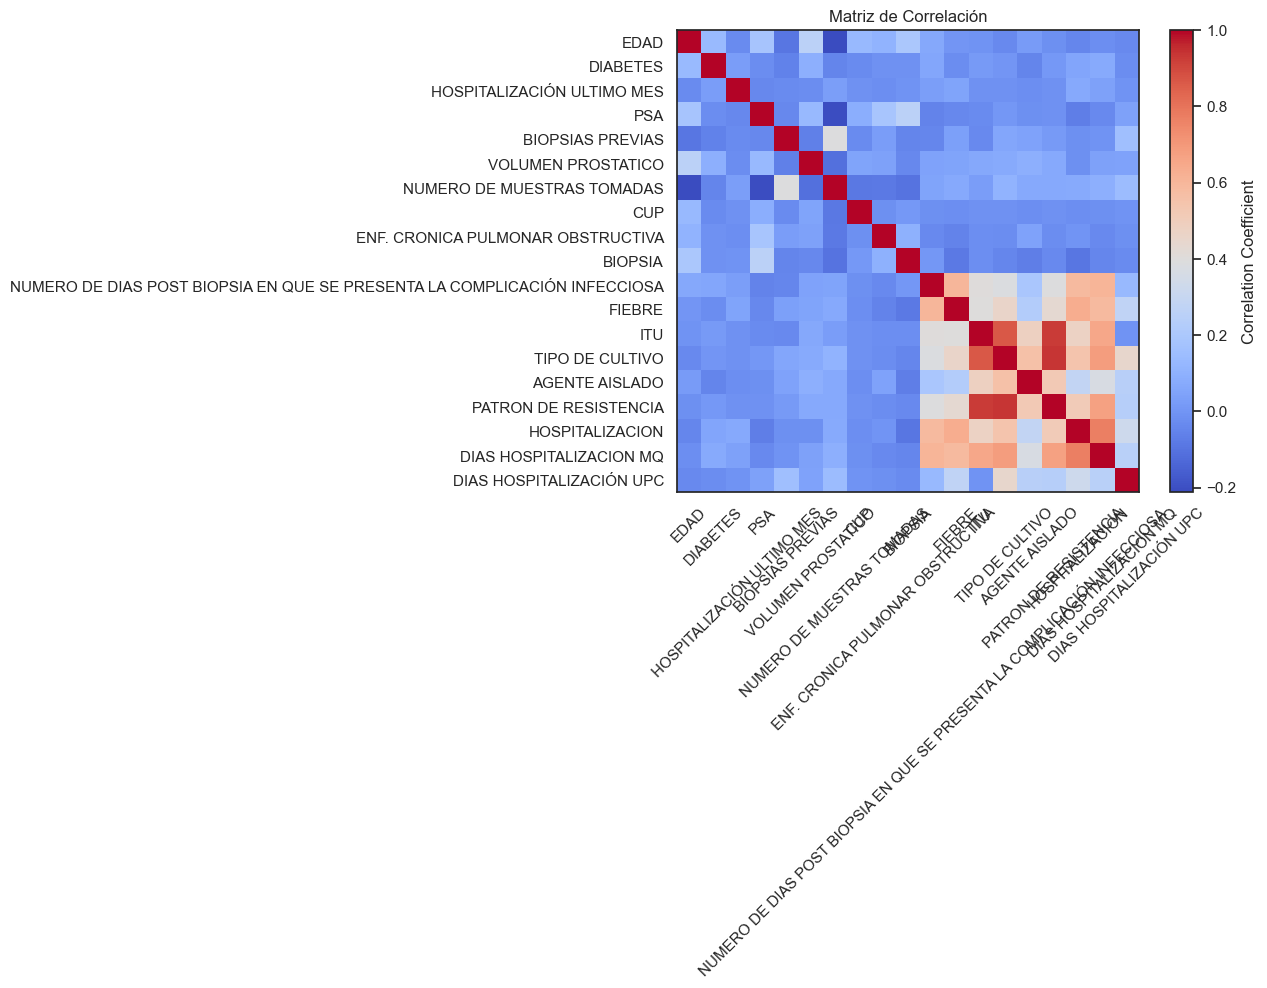

In [75]:
import numpy as np

correlation_matrix = np.corrcoef(df_cleaned, rowvar=False)


plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(df.columns)), df.columns, rotation=45)
plt.yticks(range(len(df.columns)), df.columns)
plt.title("Matriz de Correlación")
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [ ]:
cantidad_nulos_por_columna = df_cleaned.isnull().sum()
cantidad_nulos_por_columna

In [72]:
df_cleaned.to_csv('HospitalizacionesDone.csv', index=False)